### **항공사 고객 만족도 데이터 불러오기 및 데이터 살펴보기**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련셋
airline_train = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/train.csv", index_col=0)
airline_train.drop(['id'], axis=1, inplace=True)

# 시험셋
airline_test = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/test.csv", index_col=0)
airline_test.drop(['id'], axis=1, inplace=True)

In [2]:
airline_train.info(), airline_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

(None, None)

In [3]:
airline_train.describe(include="O")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [4]:
airline_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
# 결측치 제거
airline_train.dropna(inplace=True)
airline_test.dropna(inplace=True)

In [6]:
# 제거 확인
print("훈련셋 결측치: ", airline_train.isnull().sum(), sep='\n')
print("\n시험셋 결측치: ", airline_test.isnull().sum(), sep='\n')

훈련셋 결측치: 
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

시험셋 결측치: 
Gender                               0
Customer Type                 

In [7]:
# Personal Data 레이블 인코딩 (범주형 데이터를 연속형 변수로 바꿈)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# 범주형
temp_list = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]

for i in temp_list:
  # 훈련셋
  encoder.fit(airline_train[i])
  airline_train['{}_score'.format(i)] = encoder.transform(airline_train[i])
  # 시험셋
  encoder.fit(airline_test[i])
  airline_test['{}_score'.format(i)] = encoder.transform(airline_test[i])

In [8]:
# 상관관계 히트맵을 그리기 위한 더미 변수 생성
airline_train = pd.get_dummies(airline_train, columns=["Gender", "Customer Type", "Type of Travel", "Class"])

In [9]:
# 상관관계 히트맵을 그리기 위한 더미 변수 생성
airline_test = pd.get_dummies(airline_test, columns=["Gender", "Customer Type", "Type of Travel", "Class"])

In [10]:
airline_train.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'satisfaction_score', 'Gender_score',
       'Customer Type_score', 'Type of Travel_score', 'Class_score',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

### **상관관계 히트맵으로 그리기**

In [11]:
airline_heatmap = airline_train[['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction_score','Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus']]

C:\Users\com\AppData\Local\Temp\ipykernel_7972\1932523252.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(airline_heatmap_df, dtype=np.bool)


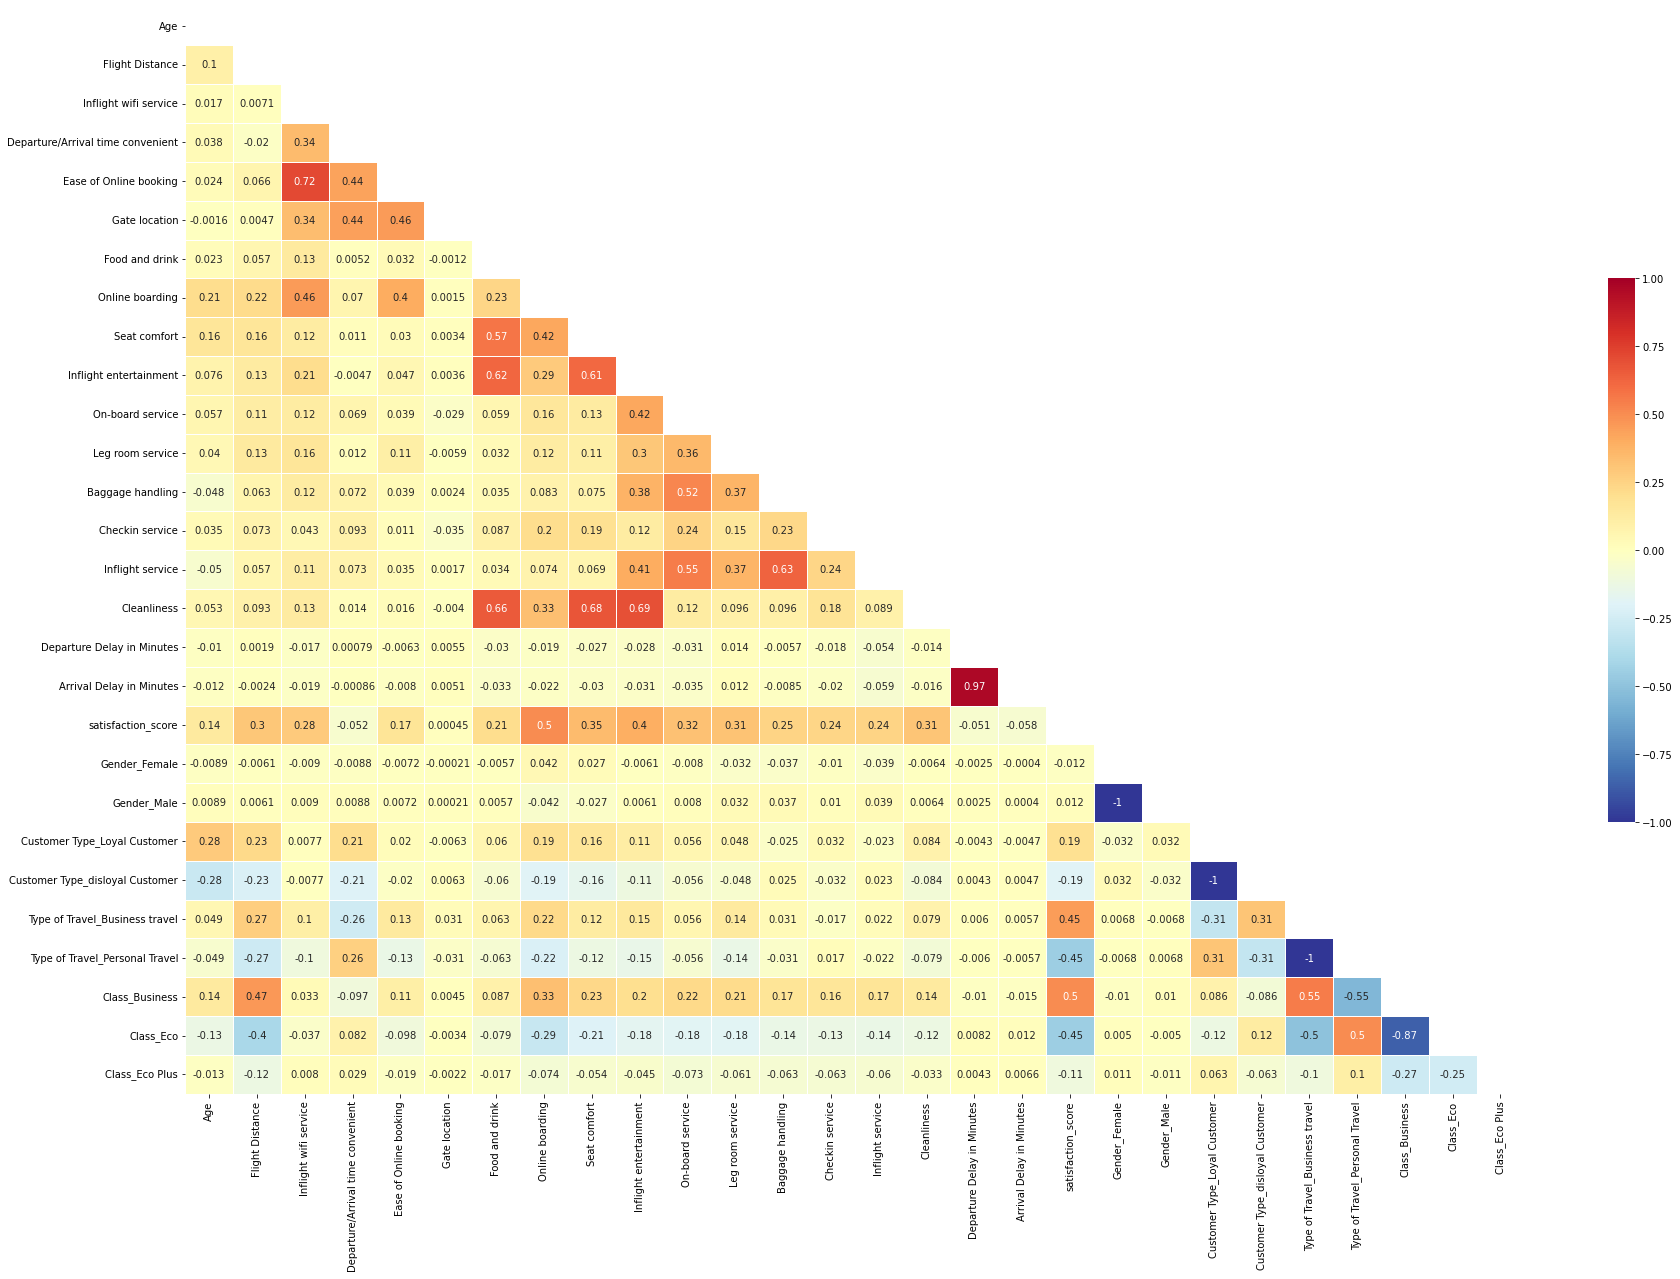

In [12]:
import numpy as np

airline_heatmap_df = airline_heatmap.corr()
fig, ax = plt.subplots( figsize=(30,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(airline_heatmap_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(airline_heatmap_df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### **모델링 및 평가**

In [13]:
# 고객 평가 지표 데이터 프레임
airline_score = airline_train[['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction_score']]

In [14]:
# y, X 정의
# y, X 정의
X_train = airline_train[['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
X_test = airline_test[['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
y_train = airline_train['satisfaction_score']
y_test = airline_test['satisfaction_score']

X_train.astype(int)
X_test.astype(int)
y_train.astype(int)
y_test.astype(int)

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction_score, Length: 25893, dtype: int32

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,  recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score
import numpy as np
import seaborn as sns

In [16]:
# 평가지표 함수 정의
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

def evaluation(airline_test, pred):
    acc = accuracy_score(airline_test, pred)
    pre = precision_score(airline_test, pred)
    rec = recall_score(airline_test, pred)
    f1 = f1_score(airline_test, pred)
    roc = roc_auc_score(airline_test, pred)
    cf_matrix = confusion_matrix(airline_test, pred)
    print("정확도: {0:.4f}".format(acc))
    print("정밀도: {0:.4f}".format(pre))
    print("재현율: {0:.4f}".format(rec))
    print("f1 score: {0:.4f}".format(f1))
    print("roc_auc_score: {0:.4f}".format(roc))
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

In [20]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


정확도: 0.9476
정밀도: 0.9527
재현율: 0.9265
f1 score: 0.9394
roc_auc_score: 0.9453


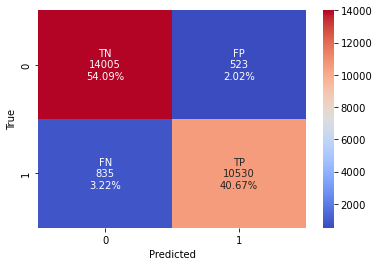

In [21]:
# XGBoost 에 필요한 라이브러리 임포트
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

# XGB 초기 모델 객체 생성
xg = XGBClassifier()
xg.fit(X_train, y_train)
pred_xgb = xg.predict(X_test)
evaluation(y_test, pred_xgb)

In [23]:
y_pred = xg.predict(X_test)  # 예측

In [24]:
print(confusion_matrix(y_test, y_pred)) # 혼동행렬 출력

[[14005   523]
 [  835 10530]]


In [25]:
print(classification_report(y_test, y_pred)) # 혼동행렬 출력

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14528
           1       0.95      0.93      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



정확도: 0.9429
정밀도: 0.9409
재현율: 0.9283
f1 score: 0.9345
roc_auc_score: 0.9413


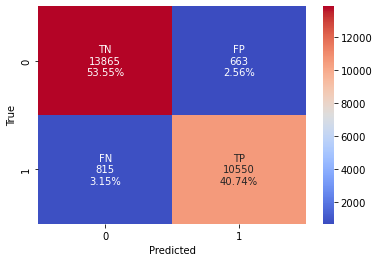

In [36]:
# XGBoost 에 필요한 라이브러리 임포트
from xgboost.sklearn import XGBClassifier

xg = XGBClassifier(n_estimators=1000, max_depth=12, learning_rate=0.3, subsample=0.5)
xg.fit(X_train, y_train)
pred_xgb = xg.predict(X_test)
evaluation(y_test, pred_xgb)

### **그리드 서치**

In [28]:
# 그리드서치 라이브러리 임포트
from sklearn.model_selection import GridSearchCV

def xgb_tuning(train_set, test_set, parameters):
    model = XGBClassifier()
    grid = GridSearchCV(model, parameters, scoring="roc_auc", cv=5, n_jobs=-1, refit = True) # cv=K-fold
    grid.fit(train_set, test_set)
    pred= grid.predict(X_test)
    return grid.best_params_, grid.best_score_, pred

In [29]:
params = {
    'learning_rate': [0.01, 0.1, 0.3], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
    'max_depth': [5, 7, 17], # 트리의 깊이 (오버피팅)
    'subsample': [0.5, 0.7, 1], # 추출할 데이터 비율
    'n_estimators': [30, 50, 100] # 트리 개수
}
xgb_tuning(X_train, y_train, params)

({'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1},
 0.9906642623753976,
 array([1, 1, 0, ..., 0, 1, 0]))

정확도: 0.9479
정밀도: 0.9517
재현율: 0.9286
f1 score: 0.9400
roc_auc_score: 0.9458


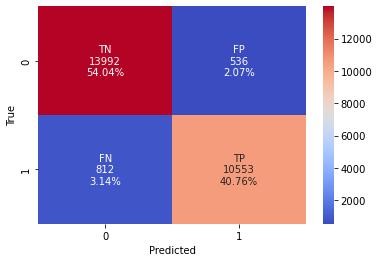

In [35]:
xg = XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.3, subsample=1)
xg.fit(X_train, y_train)
pred_xgb = xg.predict(X_test)
evaluation(y_test, pred_xgb)

In [44]:
feature_score = pd.DataFrame({'features': X_train.columns, 'values': xg.feature_importances_})
feature_score.head()

,features,values
0,Inflight wifi service,0.283712
1,Departure/Arrival time convenient,0.036041
2,Ease of Online booking,0.035622
3,Gate location,0.028264
4,Food and drink,0.033823


### **중요 변수 확인**

<AxesSubplot:xlabel='values', ylabel='features'>

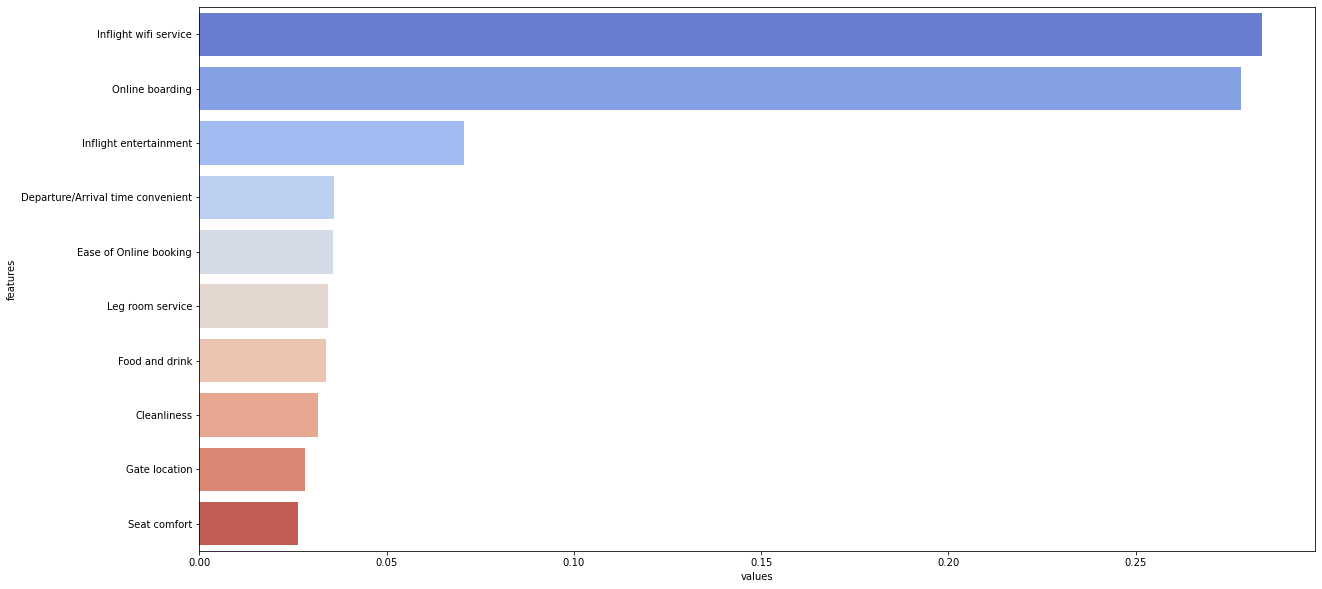

In [45]:
plt.figure(figsize=(20,10))
palette = sns.color_palette('coolwarm',10)
sns.barplot(x='values', y='features', data=feature_score.sort_values(by='values', ascending=False).head(10), palette=palette)